In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [56]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Conv2D, MaxPooling2D,BatchNormalization, Dropout
from keras.models import Model
from keras import optimizers
from keras.callbacks import EarlyStopping

from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [3]:
directory='/gdrive/MyDrive/Semi-project_02/final/'

In [4]:
print(tf.__version__)

2.3.0


In [57]:
# 디렉토리에서 이미지 데이터셋 불러오기 : train, test
train=tf.keras.preprocessing.image_dataset_from_directory(
    directory+'train',
    labels="inferred",
    label_mode="int",
    # label_mode="categorical",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=1120
)

validate=tf.keras.preprocessing.image_dataset_from_directory(
    directory+'validate',
    labels="inferred",
    label_mode="int",
    # label_mode="categorical",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=1120
)

Found 2800 files belonging to 4 classes.
Found 800 files belonging to 4 classes.


In [46]:
train
validate

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [47]:
image_input=(224,224,3)

In [92]:
# model
base_model=ResNet50(weights="imagenet",
                   include_top=False,
                   input_shape=image_input,
                    )

CLASSES = 4
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

# add a fully connected layer
predictions = Dense(CLASSES, activation='softmax')(x)

# build a model
model = Model(inputs=base_model.input, outputs=predictions)

# train only top layers
for layer in base_model.layers:
    layer.trainable=False

In [93]:
model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [94]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.0001), metrics=['accuracy'])

In [95]:
early_stopping=EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=5)

In [125]:
len(model.trainable_variables)

4

In [97]:
history=model.fit(train,
          epochs=50,
          validation_data=validate,
          validation_freq=1, 
          callbacks=[early_stopping],
          # verbose=2
)

Epoch 1/50
88/88 [==============================] - 20s 226ms/step - loss: 1.2813 - accuracy: 0.4893 - val_loss: 1.0938 - val_accuracy: 0.5362
Epoch 2/50
88/88 [==============================] - 19s 221ms/step - loss: 0.8758 - accuracy: 0.7179 - val_loss: 0.8571 - val_accuracy: 0.6600
Epoch 3/50
88/88 [==============================] - 19s 217ms/step - loss: 0.7060 - accuracy: 0.8207 - val_loss: 0.7063 - val_accuracy: 0.7850
Epoch 4/50
88/88 [==============================] - 19s 216ms/step - loss: 0.5967 - accuracy: 0.8704 - val_loss: 0.6008 - val_accuracy: 0.8525
Epoch 5/50
88/88 [==============================] - 19s 217ms/step - loss: 0.5193 - accuracy: 0.8979 - val_loss: 0.5232 - val_accuracy: 0.8763
Epoch 6/50
88/88 [==============================] - 19s 218ms/step - loss: 0.4616 - accuracy: 0.9132 - val_loss: 0.4641 - val_accuracy: 0.9025
Epoch 7/50
88/88 [==============================] - 19s 216ms/step - loss: 0.4169 - accuracy: 0.9229 - val_loss: 0.4178 - val_accuracy: 0.9175

In [104]:
model.save('/gdrive/MyDrive/Semi-project_02/ResNet50.h5')

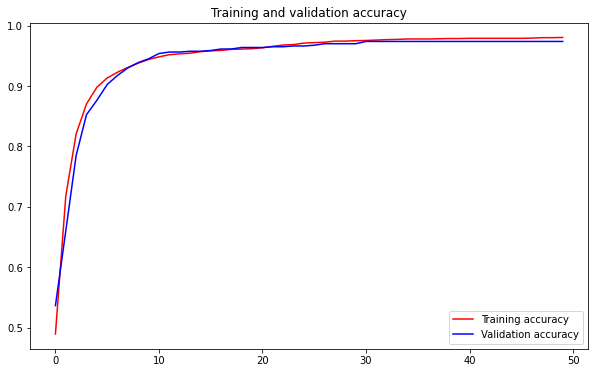

In [111]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

fig=plt.figure(figsize=(10,6))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.savefig('/gdrive/MyDrive/Semi-project_02/ResNet_accuracy.png')
plt.show()

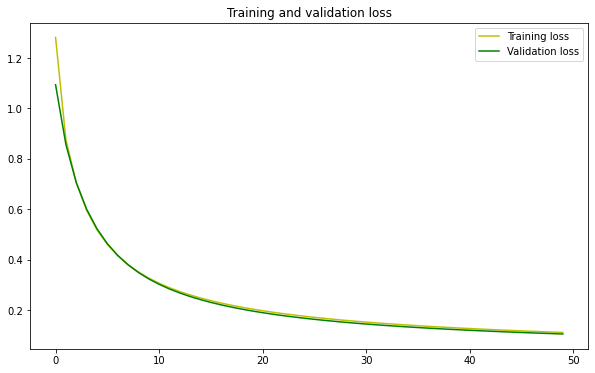

In [114]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig=plt.figure(figsize=(10,6))

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.legend(loc=0)

plt.savefig('/gdrive/MyDrive/Semi-project_02/ResNet_loss.png')
plt.show()

In [127]:
test=tf.keras.preprocessing.image_dataset_from_directory(
    directory+'test',
    labels="inferred",
    label_mode="int",
    # label_mode="categorical",
    class_names=['chin_mask', 'full_mask', 'no_mask', 'nose_mask'],
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=1120
)

Found 400 files belonging to 4 classes.


In [128]:
model.evaluate(test)

13/13 [==============================] - 121s 9s/step - loss: 0.1090 - accuracy: 0.9775


[0.1090438961982727, 0.9775000214576721]